# **8. Morphological Operations**

* Convolution 기반의 Morphological Operations 알아보기.

In [1]:
from IPython.display import display, clear_output
from configs.config import BASE_PATH
from matplotlib import pyplot as plt
import imageio
import numpy as np
import cv2
import os

path = os.path.join(BASE_PATH,"data","image",'opencv_image6.jpg')
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)

## **1. Erosion, Dilation**

### **Erosion**
- 동작 원리: Pixel wise 연산으로 커널이 이미지의 각 픽셀 위를 슬라이딩하면서, 커널이 겹치는 영역에서 최소값을 픽셀로 설정.
- 커널 내에서 최소값을 찾아 그 값을 중심 픽셀에 대입하는 방식.
- 밝은 영역을 줄이고, 어두운 영역을 확장합니다. (객체가 얇아짐)

### **Dilation**
* 동작 원리: 커널이 이미지의 각 픽셀 위를 슬라이딩하면서, 커널이 겹치는 영역에서 최댓값을 픽셀로 설정.
* 즉, 커널 내에서 최대값을 찾아 그 값을 중심 픽셀에 대입하는 방식.
* 밝은 영역을 확장하고, 어두운 영역을 줄인다. (객체의 경계가 두꺼워짐)

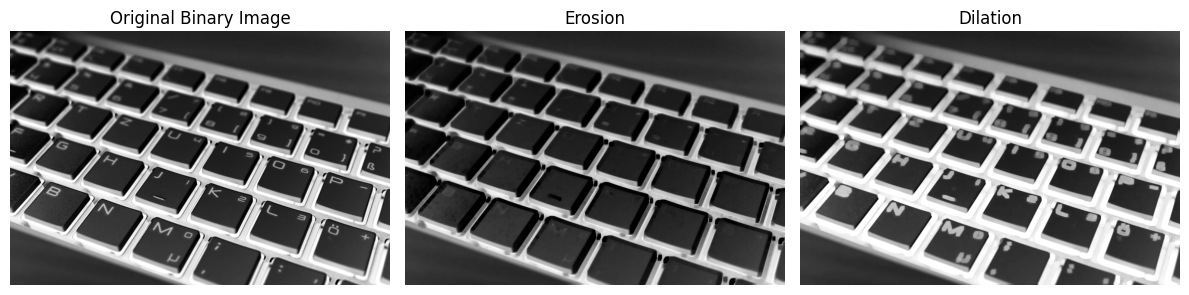

In [2]:
img_gray = 255-img_gray
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(img_gray, kernel, iterations=1)
dilation = cv2.dilate(img_gray, kernel, iterations=1)

operations = [
    ('Original Binary Image', img_gray),
    ('Erosion', erosion),
    ('Dilation', dilation)
]

plt.figure(figsize=(12,4))

for i, (title, image) in enumerate(operations, start=1):
    plt.subplot(1,3,i)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

* 보통 Gray Scale에서 사용하고, 연산 후 픽셀의 밝기가 변한다.

* 주변 픽셀 밝기의 최대, 최소값들을 할당하기 때문에 경계선이 변화한다.

* 원래 흰색이 이미지인데, 정보를 담고있는게 white인 경우가 더 설명에 잘 어울려서 색상 반전.

* Erision이나 Dilation 이름보다 이미지의 특성(밝기)에 따라서 어떤 연산을 적용할지 생각하자.
    * erision은 검은 영역 확장, Dilation은 흰색 영역 확장.

## **2. Opening, Closing**

### **Opening**

* Erosion -> Dilation 수행
* 작은 노이즈를 제거하고 객체의 경계선을 매끄럽게 만듦.

### **Closing**
* Dilation -> Erosion을 수행
* 작은 구멍이나 검은 픽셀 영역을 채우고 객체의 경계를 선명하게 만듦.

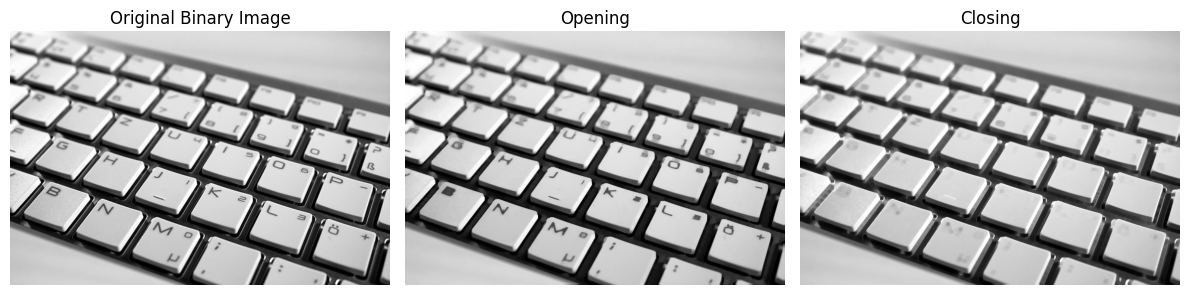

In [3]:
path = os.path.join(BASE_PATH,"data","image",'opencv_image6.jpg')
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)

opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

operations = [
    ('Original Binary Image', img_gray),
    ('Opening', cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)),
    ('Closing', cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel))
]


plt.figure(figsize=(12,4))

for i, (title, image) in enumerate(operations, start=1):
    plt.subplot(1,3,i)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

* Opening의 경우 B나 G 알파벳을 보면 안쪽 내용물이 채워진 후 다시 비워지지 않는 모습을 확인할 수 있따.
* Closing의 경우에는 이미 키보드 글씨가 얇아서 거의 Dilation에서 거의 정보가 남지 않아서 Erision후에 정보가 거의 손실된 것을 확인할 수 있다.

## **3. Gradient, Tophat, Blackhat**

### **Gradient (Morphological Gradient)**

* Gradient = Dilation - Erosion
  
* 객체의 외곽선이나 경계를 강조해줍니다.

### **Top Hat**

* Top Hat = 원본 이미지 - Opening

* Top Hat은 Opening 이후 남은 작은 객체나 밝은 부분을 강조.

### **Black Hat**

* Black Hat = Closing - 원본 이미지

* Black Hat은 Closing 이후 남은 작은 어두운 객체나 구조를 강조.

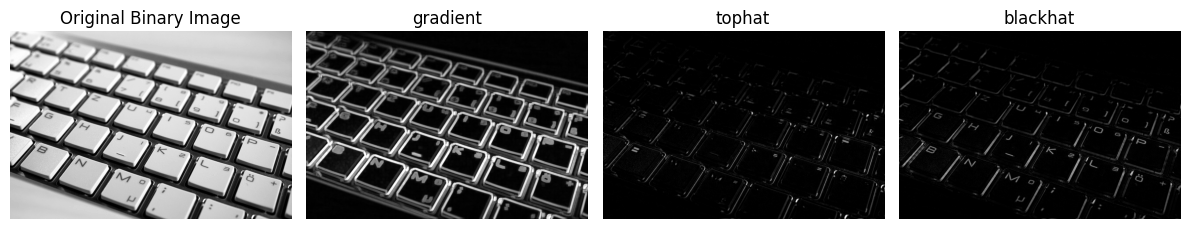

In [4]:
gradient = cv2.morphologyEx(img_gray, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, kernel)

operations = [
    ('Original Binary Image', img_gray),
    ('gradient', gradient),
    ('tophat', tophat),
    ('blackhat', blackhat)
]

plt.figure(figsize=(12,4))

for i, (title, image) in enumerate(operations, start=1):
    plt.subplot(1,4,i)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()